Привет, меня зовут Артем Носенко и я буду проверять твой проект.
<br>Небольшая вступительная часть и начнем работу)
<br> Если не против, то предлагаю общаться на «ты». Если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — не указать на совершенные ошибки, а поделиться своим опытом и помочь сделать твой проект лучше. Для этого я буду использовать разный стиль оформления комментариев.
<div class="alert alert-block alert-success">
✔️ Все хорошо.
</div>

<div class="alert alert-warning">
⚠️ Критических замечаний нет, но есть возможность сделать твою работу лучше.
</div>

<div class="alert alert-block alert-danger">
❌ Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Артем, привет! Спасибо за комментарии и советы и возможность задать вопросы. Я обязательно внесу все правки, которые ты выслал, когда буду делать вторую часть (там нужно создать микросервис с рекомандациями) и отправлю рабочий сервис с улучшениями. Правки все поняла. Пока таких прям вопросов нет, я разбиралась в интернете по ходу дела. До начала раоты над этим проектом  
</div>

# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [1]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None)

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Отлично, импорты сделаны!
</div>

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [2]:
tracks = pd.read_parquet('tracks.parquet')
catalog_names = pd.read_parquet('catalog_names.parquet')
interactions = pd.read_parquet('interactions.parquet')

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [3]:
tracks.head(5)

,track_id,albums,artists,genres
0,26,"[3, 2490753]",[16],"[11, 21]"
1,38,"[3, 2490753]",[16],"[11, 21]"
2,135,"[12, 214, 2490809]",[84],[11]
3,136,"[12, 214, 2490809]",[84],[11]
4,138,"[12, 214, 322, 72275, 72292, 91199, 213505, 24...",[84],[11]


In [4]:
catalog_names.head(5)

,id,type,name
0,3,album,Taller Children
1,12,album,Wild Young Hearts
2,13,album,Lonesome Crow
3,17,album,Graffiti Soul
4,26,album,Blues Six Pack


In [5]:
interactions.head(5)

,user_id,track_id,track_seq,started_at
0,0,99262,1,2022-07-17
1,0,589498,2,2022-07-19
2,0,590262,3,2022-07-21
3,0,590303,4,2022-07-22
4,0,590692,5,2022-07-22


In [6]:
print("Инфо по tracks")
print(tracks.info())
print("\n")
print("Инфо по catalog_names")
print(catalog_names.info())
print("\n")
print("Инфо по interactions")
print(interactions.info())

Инфо по tracks
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB
None


Инфо по catalog_names
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB
None


Инфо по interactions
<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16        

In [7]:
print(tracks['track_id'].nunique())
print(catalog_names['id'].nunique())
print(interactions['user_id'].nunique())

1000000
1776697
1373221


<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Данные загружены, все верно!
</div>

### Таблицы большие, нужно экономить память, поэтому поменяем какие-то типы данных

In [8]:
interactions['track_seq'] = interactions['track_seq'].astype('int16')

## Посмотрим на пропуски и на явные (неявные пока не берем) дубликаты

In [9]:
print("Пропуски в tracks")
print(tracks.isna().sum())
print("\n")
print("Пропуски в catalog_names")
print(catalog_names.isna().sum())
print("\n")
print("Пропуски в interactions")
print(interactions.isna().sum())

Пропуски в tracks
track_id    0
albums      0
artists     0
genres      0
dtype: int64


Пропуски в catalog_names
id      0
type    0
name    0
dtype: int64


Пропуски в interactions
user_id       0
track_id      0
track_seq     0
started_at    0
dtype: int64


In [10]:
print(len(tracks))
print(len(catalog_names))
print(len(interactions))

1000000
1812471
222629898


In [11]:
# Функция для очистки от дубликатов, явных и неявных. 
def clean_duplicates(df, subset_list=None):
    """
    df: DataFrame для очистки
    subset_list: пока не подаем, т к по мсыслу наличие таких дубликатов возможно
    """
    #Удаляем явные дубликаты по всем колонкам
    # Преобразуем object-колонки с массивами в кортежи
    for col in df.select_dtypes(include=['object']):
        df[col] = df[col].apply(lambda x: tuple(x) if isinstance(x, (list, np.ndarray)) else x)
    
    df.drop_duplicates(inplace=True)

    
    # Удаляем неявные дубликаты по subset
    if subset_list:
        for subset in subset_list:
            # Преобразуем массивы только в subset-колонках
            for col in subset:
                if col in df.columns and df[col].dtype == 'object':
                    df[col] = df[col].apply(lambda x: tuple(x) if isinstance(x, (list, np.ndarray)) else x)
            df.drop_duplicates(subset=subset, inplace=True)



In [12]:
clean_duplicates(tracks)
clean_duplicates(catalog_names)
clean_duplicates(interactions)


In [13]:
print(len(tracks))
print(len(catalog_names))
print(len(interactions))

1000000
1812471
222629898


Далее нужно сохранить очищенный от дублей фрейм, очистить память от старого дф и других переменных, т. е. можно сделать Restart Kernel.


In [14]:
# Сохранение 
interactions.to_parquet('interactions_clean.parquet', index=False)
tracks.to_parquet('tracks_clean.parquet', index=False)
catalog_names.to_parquet('catalog_names_clean.parquet', index=False)


Делаем Restart Kernel

In [1]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None)

In [2]:
tracks = pd.read_parquet('tracks_clean.parquet')
catalog_names = pd.read_parquet('catalog_names_clean.parquet')
interactions = pd.read_parquet('interactions_clean.parquet')

In [3]:
print(len(tracks))
print(len(catalog_names))
print(len(interactions))

1000000
1812471
222629898


Далее будем резать датафреймы, так как не хватает памяти работать с более чем 200 000 000 строк. Но сначала нужно проверить, есть ли треки в tracks, которые никто не слушал.

In [4]:
listened_tracks = set(interactions['track_id'].unique())
catalog_tracks = set(tracks['track_id'].unique())

unlistened_tracks = catalog_tracks - listened_tracks

print(f"Треков в каталоге: {len(catalog_tracks):,}")
print(f"Треков с прослушиваниями: {len(listened_tracks):,}")
print(f"Треков БЕЗ прослушиваний: {len(unlistened_tracks):,}")
print(f"Процент неслушанных: {len(unlistened_tracks)/len(catalog_tracks)*100:.1f}%")

Треков в каталоге: 1,000,000
Треков с прослушиваниями: 1,000,000
Треков БЕЗ прослушиваний: 0
Процент неслушанных: 0.0%


Немного порежем датасеты, так как с ресурсами сложности. Полный датасет не получается использвать с текущей ВМ.

In [5]:
# Берём случайную выборку пользователей
n_users = 100_000 
sampled_users = interactions['user_id'].drop_duplicates().sample(n=n_users, random_state=42)

# Берём ВСЕ их прослушивания
interactions= interactions[interactions['user_id'].isin(sampled_users)].copy()

print(f"Пользователей: {interactions['user_id'].nunique():,}")
print(f"Прослушиваний: {len(interactions):,}")
print(f"Уникальных треков: {interactions['track_id'].nunique():,}")

# Проверяем покрытие каталога
listened_tracks = set(interactions['track_id'].unique())
catalog_tracks = set(tracks['track_id'].unique())
print(f"Покрытие каталога: {len(listened_tracks)/len(catalog_tracks)*100:.1f}%")

Пользователей: 100,000
Прослушиваний: 16,272,202
Уникальных треков: 724,595
Покрытие каталога: 72.5%


In [6]:
print("Треки без исполнителей:",
      tracks['artists'].isnull().sum() + tracks['artists'].apply(lambda x: len(x) == 0 if isinstance(x, (list, str)) else False).sum())

print("Треки без альбомов:",
      tracks['albums'].isnull().sum() + tracks['albums'].apply(lambda x: len(x) == 0 if isinstance(x, (list, str)) else False).sum())

print("Треки без жанров:",
      tracks['genres'].isnull().sum() + tracks['genres'].apply(lambda x: len(x) == 0 if isinstance(x, (list, str)) else False).sum())


Треки без исполнителей: 0
Треки без альбомов: 0
Треки без жанров: 0


In [7]:
unknown_tracks = tracks[(tracks['artists'].str.len() == 0) | (tracks['artists'].isnull())]['track_id']
unknown_listens = interactions['track_id'].isin(unknown_tracks).sum()
total_listens = len(interactions)
print(f"Прослушиваний треков без упоминания автора: {unknown_listens:,} ({unknown_listens/total_listens*100:.2f}%)")

Прослушиваний треков без упоминания автора: 21,281 (0.13%)


In [8]:
no_genre_tracks = tracks[(tracks['genres'].str.len() == 0) | (tracks['genres'].isnull())]['track_id']
no_genre_listens = interactions['track_id'].isin(no_genre_tracks).sum()
print(f"Прослушиваний треков без жанров: {no_genre_listens:,} ({no_genre_listens/len(interactions)*100:.2f}%)")

Прослушиваний треков без жанров: 11,309 (0.07%)


In [9]:
del unknown_tracks
del unknown_listens
del total_listens
del no_genre_tracks
del no_genre_listens

## Промежуточный вывод

Игнорируем все три категории без метаданных:

Треки без исполнителей: 0.13% прослушиваний
Треки без жанров: 0.07% прослушиваний
Треки без альбомов: ничтожно мало

Суммарно это <0.2% данных, не повлияет на качество рекомендаций.

Посмотрим, есть ли аномалии в датах прослушивания, количестве секунд прослушиваний

In [10]:
# Ищем пользователей, у которых очень много треков в один день
daily_tracks = interactions.groupby(['user_id', 'started_at']).size().reset_index(name='tracks_per_day')

# Находим максимум треков в день для каждого пользователя
max_daily = daily_tracks.groupby('user_id')['tracks_per_day'].max()

# Боты это те кто слушает >250 треков в день (физически невозможно столько наслушать). Начнем с этой йифры, если будут такие, пойдем смотреть дальше.
bots = max_daily[max_daily > 250].index
print(f"Найдено ботов: {len(bots):,}")
print(f"Прослушиваний потенциальных ботов: {interactions['user_id'].isin(bots).sum():,} ({interactions['user_id'].isin(bots).sum()/len(interactions)*100:.2f}%)")

Найдено ботов: 0
Прослушиваний потенциальных ботов: 0 (0.00%)


Посмотрим, есть ли резкий скачки по временной шкале

In [11]:
# Считаем прослушивания по дням
daily_listens = interactions.groupby('started_at').size().reset_index(name='listens')
daily_listens = daily_listens.sort_values('started_at')

# Находим день с максимальным падением
daily_listens['listens_diff'] = daily_listens['listens'].diff()
biggest_drop = daily_listens.loc[daily_listens['listens_diff'].idxmin()]

print(f"День с максимальным падением: {biggest_drop['started_at']}")
print(f"Падение на: {biggest_drop['listens_diff']:,.0f} прослушиваний")
print(f"До: {daily_listens.loc[biggest_drop.name-1, 'listens']:,.0f}, После: {biggest_drop['listens']:,.0f}")


День с максимальным падением: 2022-12-31 00:00:00
Падение на: -25,085 прослушиваний
До: 36,696, После: 11,611


In [12]:
print(interactions['started_at'].max())
print(interactions['started_at'].min())

2022-12-31 00:00:00
2022-01-01 00:00:00


Возможно, в новогодние праздничные дни слушали меньше музыки, такое падение нормально. Не будем срезать этот день.

In [13]:
# Треки в interactions, которых нет в tracks
missing_tracks = ~interactions['track_id'].isin(tracks['track_id'])
print(f"Прослушиваний несуществующих треков: {missing_tracks.sum():,} ({missing_tracks.sum()/len(interactions)*100:.2f}%)")

Прослушиваний несуществующих треков: 0 (0.00%)


In [14]:
user_counts = interactions.groupby('user_id').size()
print(f"Пользователей с 1 прослушиванием: {(user_counts == 1).sum():,} ({(user_counts == 1).sum()/len(user_counts)*100:.2f}%)")
print(f"Пользователей с 0 прослушиванием: {(user_counts == 0).sum():,} ({(user_counts == 0).sum()/len(user_counts)*100:.2f}%)")

Пользователей с 1 прослушиванием: 58 (0.06%)
Пользователей с 0 прослушиванием: 0 (0.00%)


In [15]:
# Сохранение
interactions.to_parquet('interactions_clean.parquet', index=False)
tracks.to_parquet('tracks_clean.parquet', index=False)
catalog_names.to_parquet('catalog_names_clean.parquet', index=False)


# Выводы

Приведём выводы по первому знакомству с данными:
- Явных из ряда вон проблем в данных нету. Были явные дубли, они были удалены.
- Выбросы похожи на реальных пользователей, фанатов музыки. Их поведение не похоже на ботское, поэтому не удаляли. Ниже проанализируем по квантилям количество треков на пользователя.
- Треки с неизвестными исполнителями, альбомами, жанрами имеются, но их ничтожно мало.
- Были изменены типы данных на менее объемные по памяти, чтобы сэкономить ресурсы.
- Временную шкалу не трогаем, тот факт, что в последние ни декабря слушали меньше музыки, кажется нормальным.
- в датафрейме с треками нет треков, которые никто не слушал, то есть, все эти треки нам пригодятся.
- Около 40% всех прослушиваний это 1% самых популярных треков, что тоже нормально.
- Совсем неактивных пользователей ничтожно мало, и мы их оставляем.

По всем этим причинам было принят решение не делать с данными ничего.

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Выводы корректные, молодец!
</div>

# === ЭТАП 2 ===

# EDA

Здесь можно сделать Restart Kernel и снова загрузить данные. 

In [1]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None)

In [2]:
tracks = pd.read_parquet('tracks_clean.parquet')
catalog_names = pd.read_parquet('catalog_names_clean.parquet')
interactions = pd.read_parquet('interactions_clean.parquet')

### Распределение количества прослушанных треков.

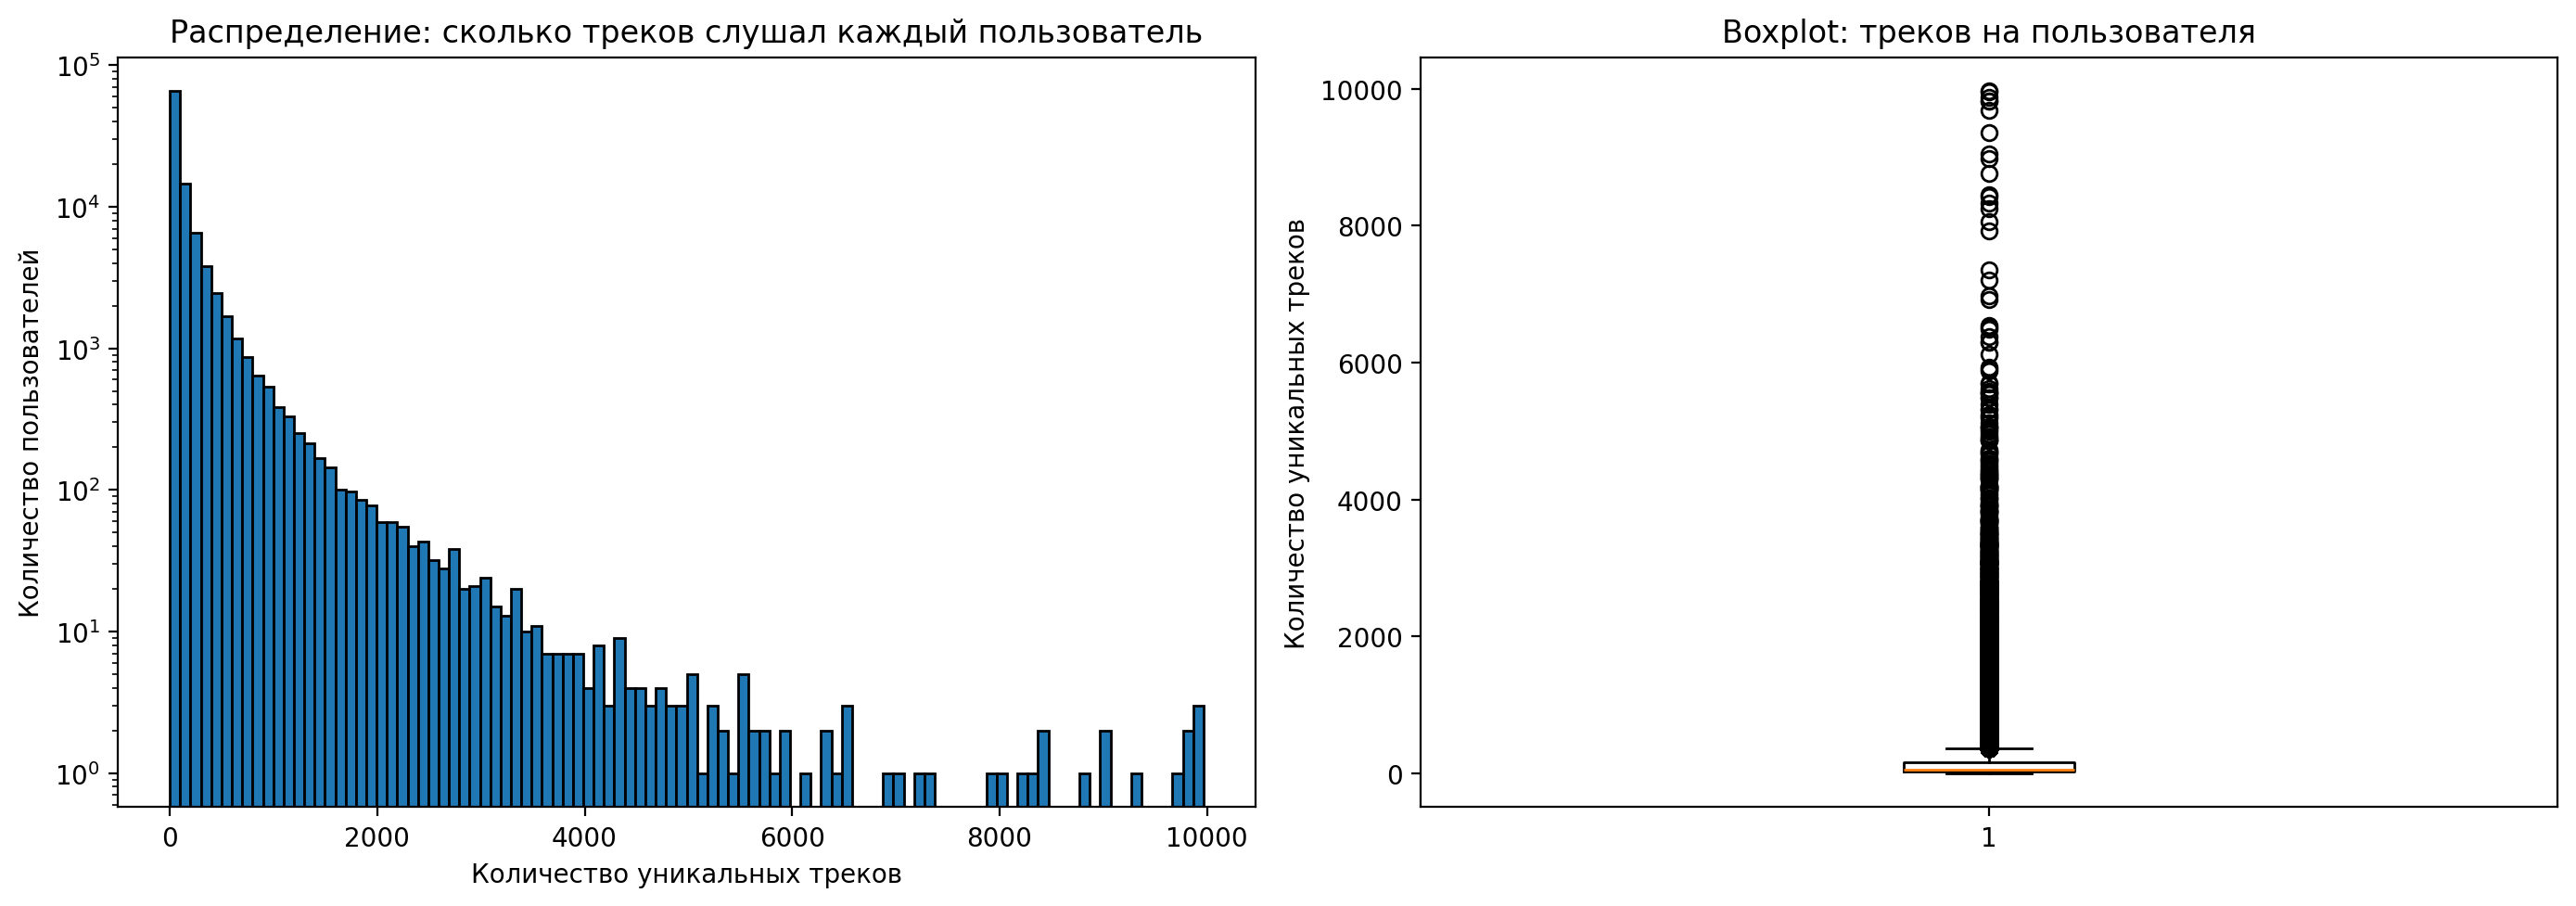

Статистика:
count    100000.000000
mean        162.722020
std         347.889167
min           1.000000
25%          22.000000
50%          55.000000
75%         156.000000
max        9965.000000
Name: track_id, dtype: float64


In [3]:
user_track_counts = interactions.groupby('user_id')['track_id'].nunique()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма
axes[0].hist(user_track_counts, bins=100, edgecolor='black')
axes[0].set_xlabel('Количество уникальных треков')
axes[0].set_ylabel('Количество пользователей')
axes[0].set_title('Распределение: сколько треков слушал каждый пользователь')
axes[0].set_yscale('log')

# Boxplot
axes[1].boxplot(user_track_counts)
axes[1].set_ylabel('Количество уникальных треков')
axes[1].set_title('Boxplot: треков на пользователя')

plt.tight_layout()
plt.show()

print("Статистика:")
print(user_track_counts.describe())

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Отличный график с распределением!
</div>

<div class="alert alert-warning">
    
⚠️ boxplot менее полезен, возможно стоит его убрать.
</div>

In [4]:
del user_track_counts

In [5]:
# Проверим распределение прослушиваний треков на пользователя по квантилям
print(interactions['track_seq'].quantile([0.90, 0.95, 0.99, 0.999]))

0.900    1137.00
0.950    1803.00
0.990    3999.99
0.999    8037.00
Name: track_seq, dtype: float64


- 90% пользователей прослушали около 1152 треков,
- 95%  около 1837 треков,
- 99% около  4213 треков,
- 99.9% около 8090 треков



Максимум: 16637 треков

Распределение нормальное.

### Наиболее популярные треки

In [6]:
track_popularity = interactions['track_id'].value_counts()
print(f"\nТоп-1% треков покрывают {track_popularity.head(int(len(track_popularity)*0.01)).sum()/len(interactions)*100:.1f}% прослушиваний")


Топ-1% треков покрывают 38.7% прослушиваний


In [7]:
del track_popularity

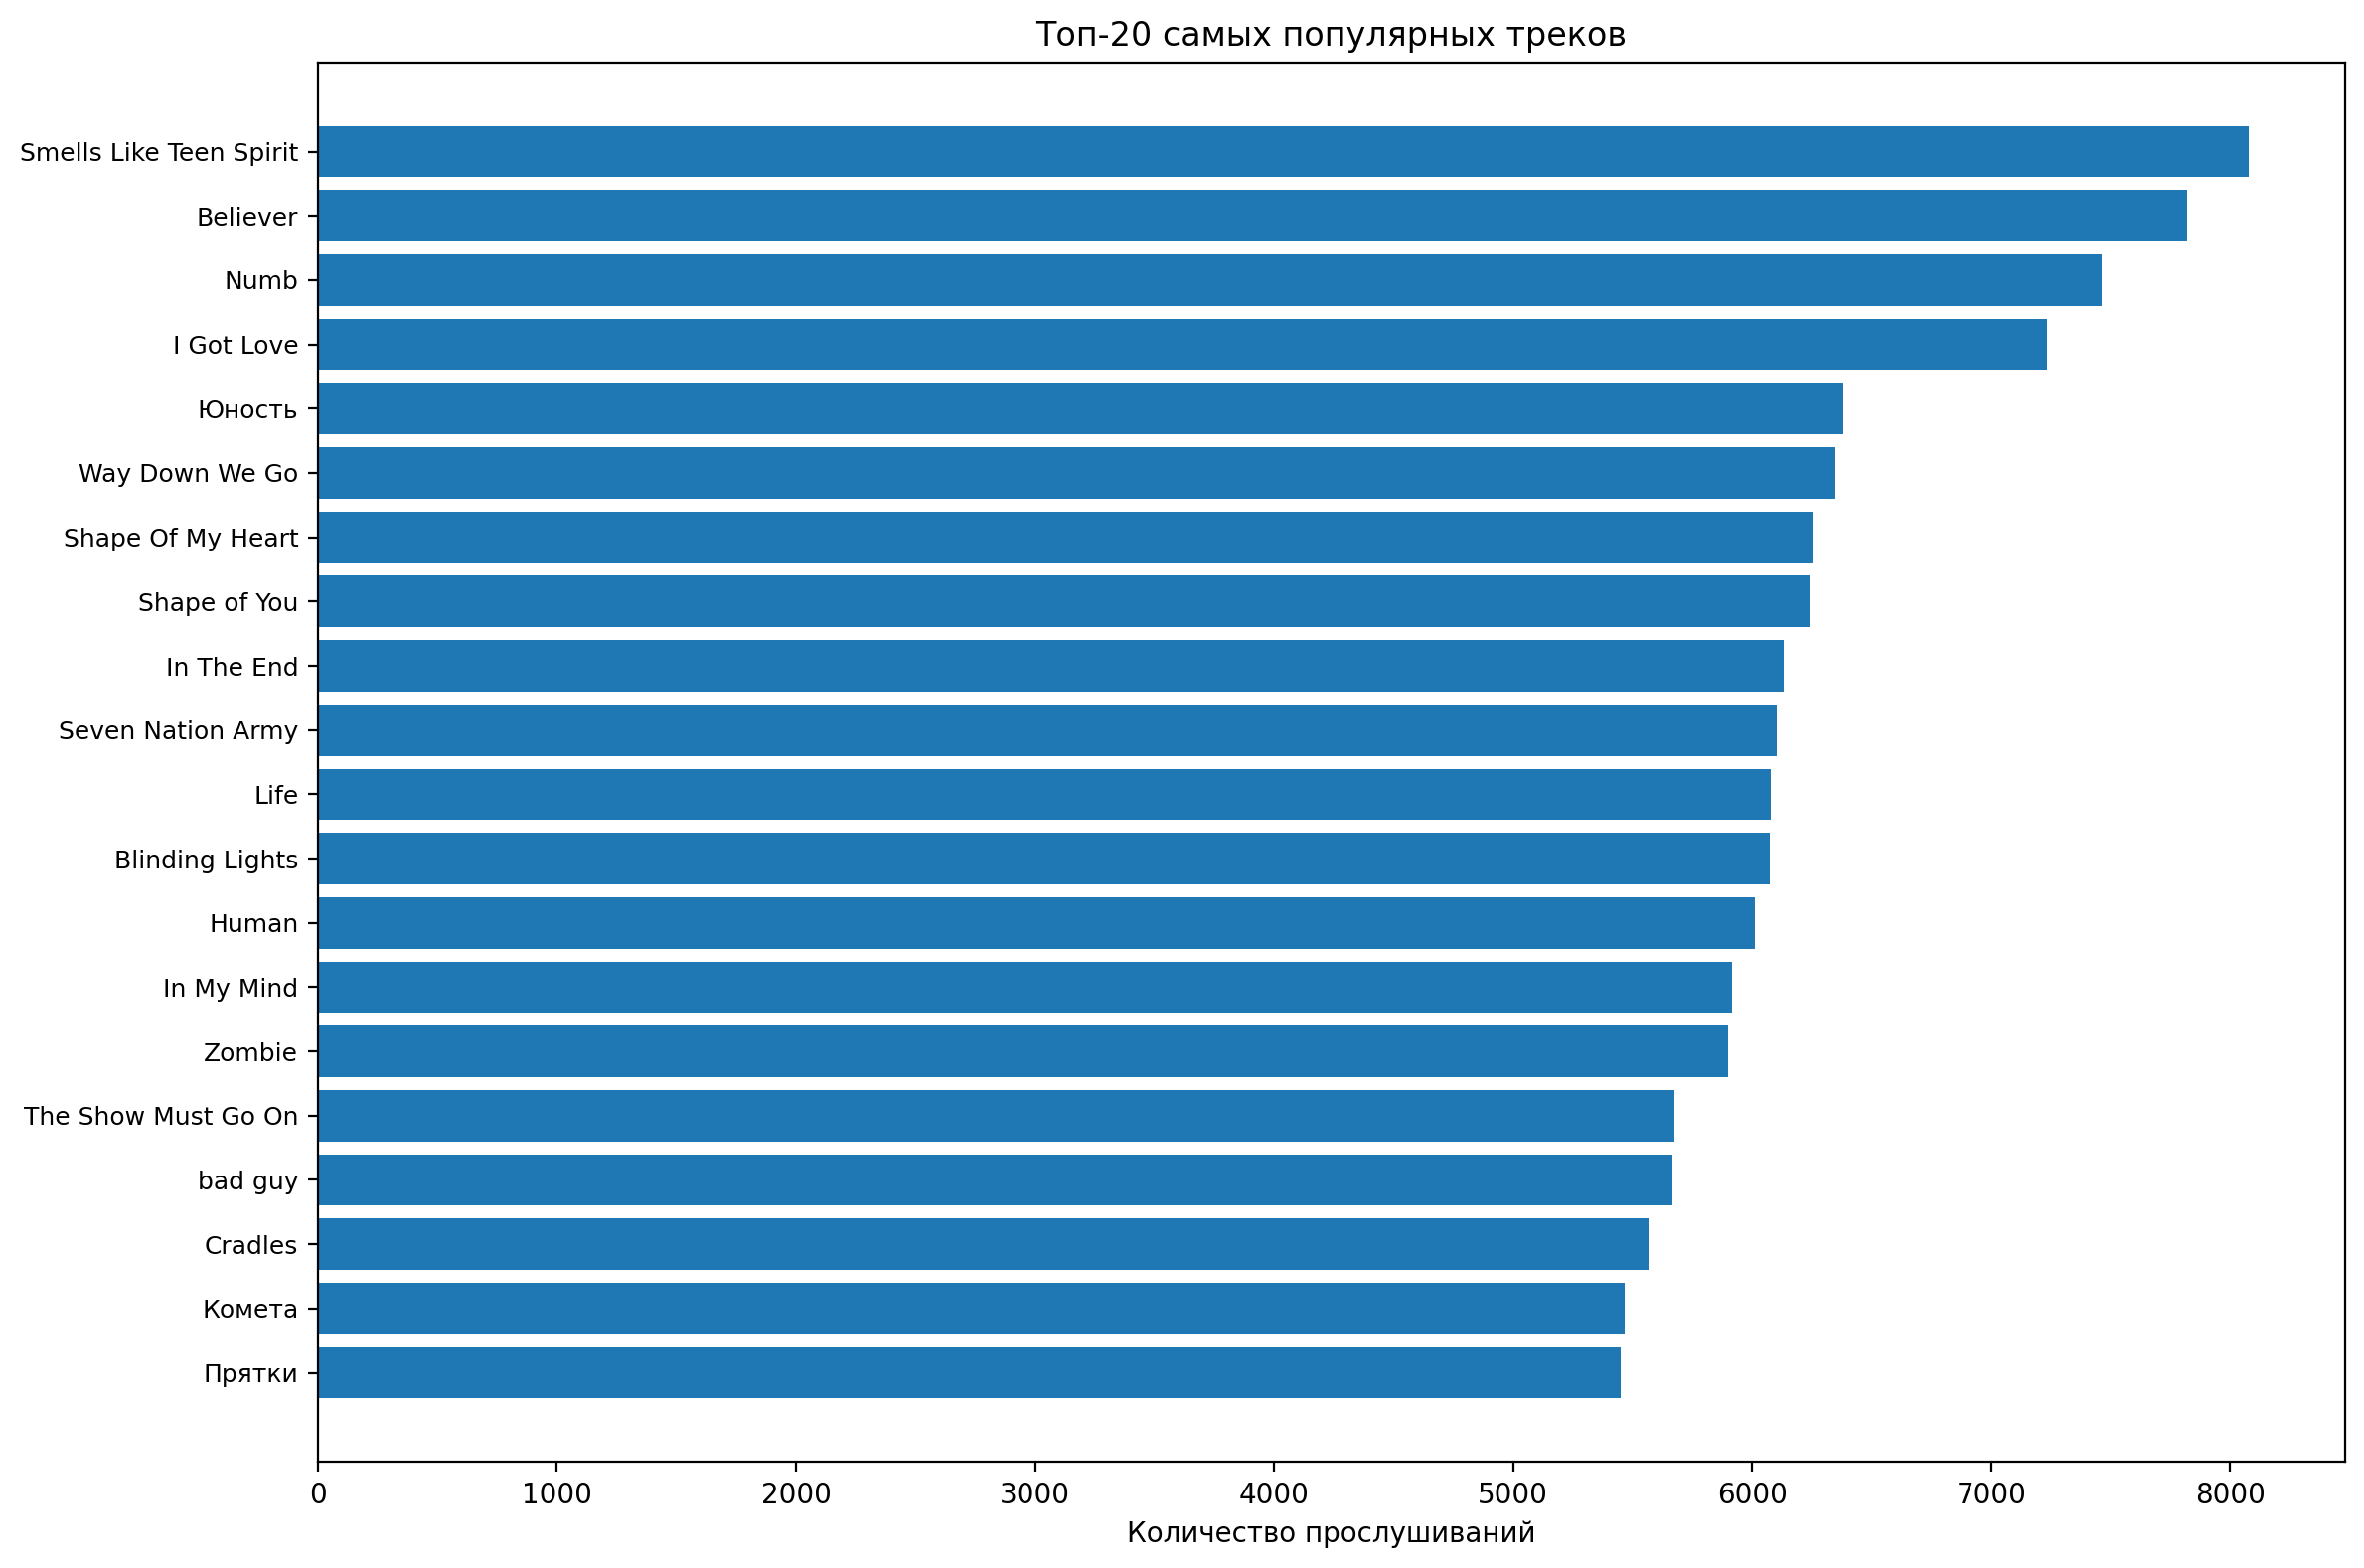

Самый популярный трек: 8,076 прослушиваний


In [8]:
track_popularity = interactions['track_id'].value_counts().head(20)

# Получаем названия треков
track_names = catalog_names[catalog_names['id'].isin(track_popularity.index) & (catalog_names['type'] == 'track')]
track_names_dict = dict(zip(track_names['id'], track_names['name']))

# Создаем labels (если названия есть, иначе id)
labels = [track_names_dict.get(tid, f"Track {tid}") for tid in track_popularity.index]

plt.figure(figsize=(12, 8))
plt.barh(range(len(track_popularity)), track_popularity.values)
plt.yticks(range(len(track_popularity)), labels, fontsize=9)
plt.xlabel('Количество прослушиваний')
plt.title('Топ-20 самых популярных треков')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(f"Самый популярный трек: {track_popularity.iloc[0]:,} прослушиваний")

<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Выглядит логично!
</div>

### Наиболее популярные жанры

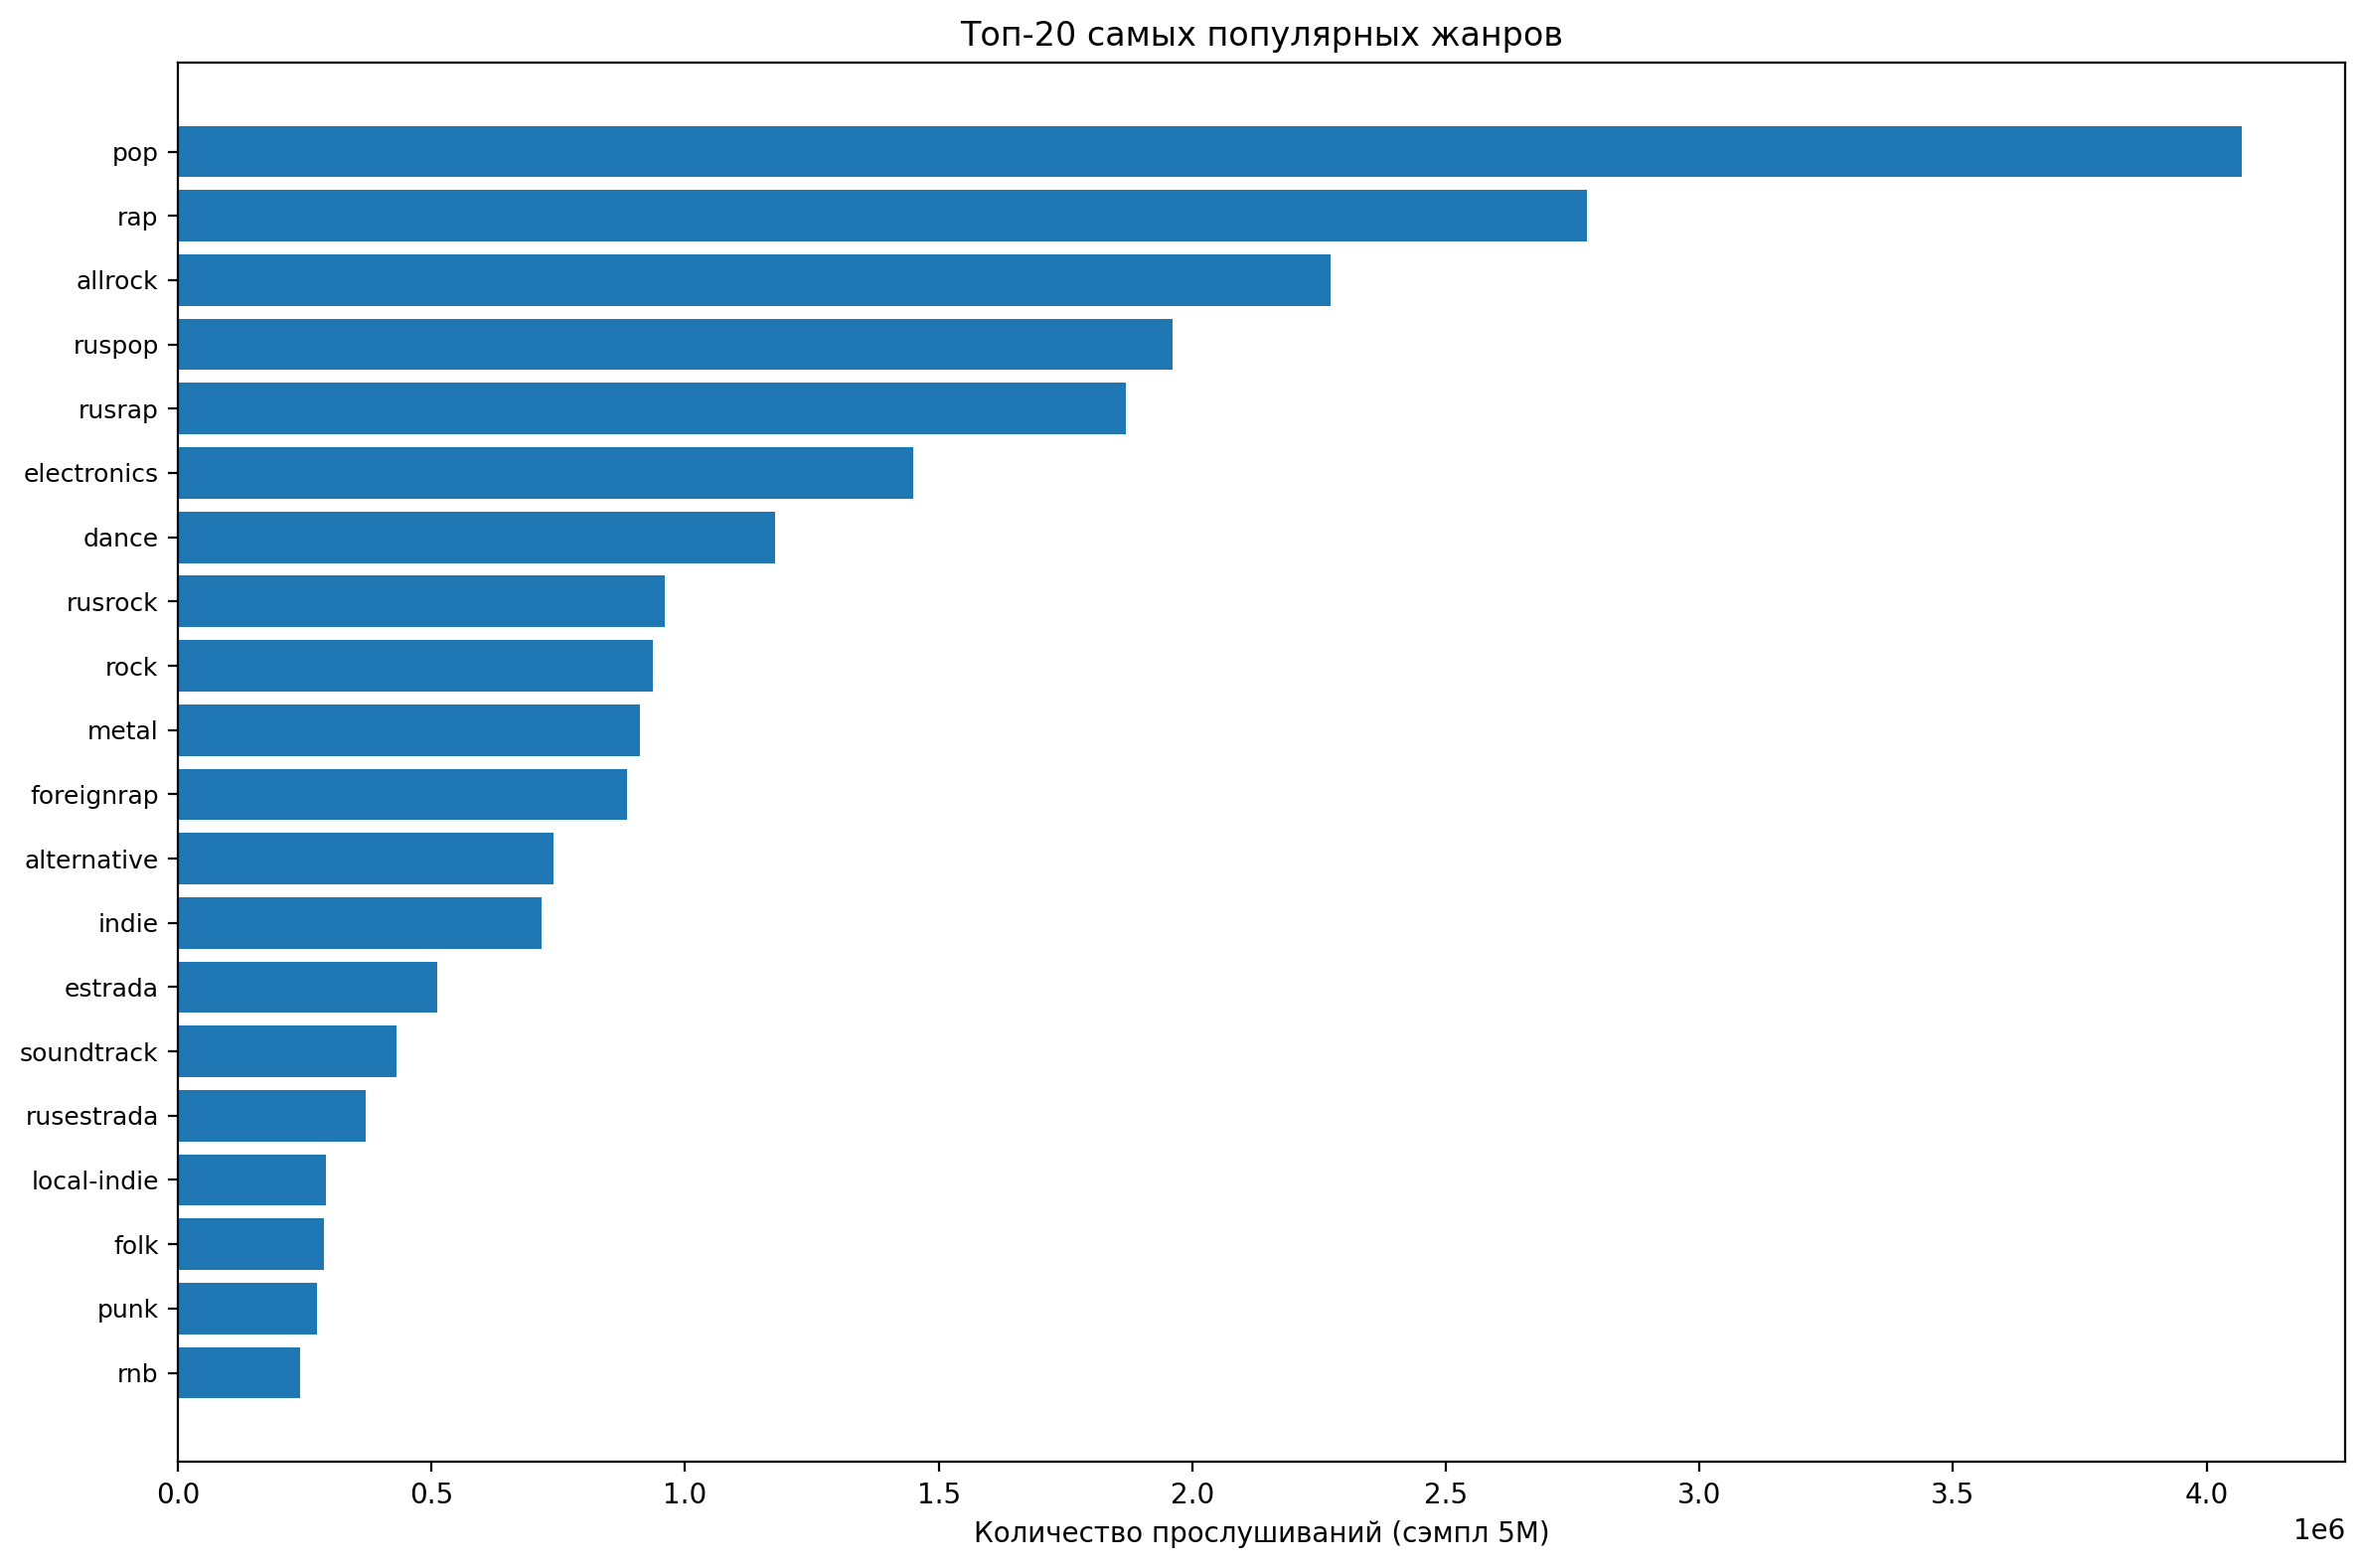

In [9]:
# Разворачиваем жанры
track_genre_map = tracks.explode('genres')[['track_id', 'genres']].dropna()

# Merge с сэмплом
genre_listens = interactions.merge(track_genre_map, on='track_id', how='left')
genre_popularity = genre_listens['genres'].value_counts().head(20)

# Получаем названия
genre_names = catalog_names[catalog_names['id'].isin(genre_popularity.index) & (catalog_names['type'] == 'genre')]
genre_names_dict = dict(zip(genre_names['id'], genre_names['name']))
labels = [genre_names_dict.get(gid, f"Genre {gid}") for gid in genre_popularity.index]

plt.figure(figsize=(12, 8))
plt.barh(range(len(genre_popularity)), genre_popularity.values)
plt.yticks(range(len(genre_popularity)), labels, fontsize=9)
plt.xlabel('Количество прослушиваний (сэмпл 5М)')
plt.title('Топ-20 самых популярных жанров')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Треки, которые никто не прослушал. Конечно, покрытие не идуальное, но мы же резали данные.

In [10]:
listened_tracks = interactions['track_id'].unique()
print(f"Треков в каталоге: {len(tracks):,}")
print(f"Треков с прослушиваниями: {len(listened_tracks):,}")
print(f"Треков БЕЗ прослушиваний: {len(tracks) - len(listened_tracks):,}")


Треков в каталоге: 1,000,000
Треков с прослушиваниями: 724,595
Треков БЕЗ прослушиваний: 275,405


Здесь можно сделать Restart Kernel.

# === ЭТАП 3 ===

# Сохранение данных

In [1]:
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix
import os
from catboost import CatBoostRanker, Pool
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None)



/home/mle-user/mle_projects/mle-project-sprint-4-v001/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

items = pd.read_parquet('tracks_clean.parquet')
catalog_names = pd.read_parquet('catalog_names_clean.parquet')
events = pd.read_parquet('interactions_clean.parquet')


In [3]:
len(events)

16272202

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.


In [4]:


# Настройка для Yandex Cloud S3
bucket_name = 's3-student-mle-20250729-0060996a6e-freetrack'

storage_options = {
    'key': 'YCAJE3Nlz8iDILW5VTYM1ihQB',
    'secret': 'YCPjvS7uwhvJpUj3bKm8X-IX4QAwBIVsvX61IL44',
    'client_kwargs': {
        'endpoint_url': 'https://storage.yandexcloud.net'
    }
}

# Загрузка в S3
items.to_parquet(
    f's3://{bucket_name}/recsys/data/items.parquet',
    index=False,
    storage_options=storage_options
)

events.to_parquet(
    f's3://{bucket_name}/recsys/data/events.parquet',
    index=False,
    storage_options=storage_options
)

print("Файлы загружены в S3")

Файлы загружены в S3


# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций. Сначала разделим на train/test.

In [5]:
print(events['started_at'].max())
print(events['started_at'].min())

2022-12-31 00:00:00
2022-01-01 00:00:00


# Разбиение данных

Теперь разобьем на train, val,test и пропустим через энкодер для ALS

In [6]:
# РАЗДЕЛЕНИЕ НА TRAIN_FIT, TRAIN_VAL, TEST
val_date = pd.Timestamp('2022-12-01')
test_date = pd.Timestamp('2022-12-16')

train_fit = events[events['started_at'] < val_date].copy()
train_val = events[(events['started_at'] >= val_date) & (events['started_at'] < test_date)].copy()
test = events[events['started_at'] >= test_date].copy()

print(f"Train fit: {len(train_fit):,} (до {val_date.date()})")
print(f"Train val: {len(train_val):,} ({val_date.date()} - {test_date.date()})")
print(f"Test: {len(test):,} (с {test_date.date()})")

#  ЭНКОДИНГ НА ОСНОВЕ ВСЕХ ДАННЫХ
user_encoder = LabelEncoder()
user_encoder.fit(events['user_id'])

track_encoder = LabelEncoder()
track_encoder.fit(events['track_id'])

# Применяем ко всем датасетам
train_fit['user_id_enc'] = user_encoder.transform(train_fit['user_id'])
train_fit['track_id_enc'] = track_encoder.transform(train_fit['track_id'])

train_val['user_id_enc'] = user_encoder.transform(train_val['user_id'])
train_val['track_id_enc'] = track_encoder.transform(train_val['track_id'])

test['user_id_enc'] = user_encoder.transform(test['user_id'])
test['track_id_enc'] = track_encoder.transform(test['track_id'])

print(f"\nУникальных пользователей: {len(user_encoder.classes_):,}")
print(f"Уникальных треков: {len(track_encoder.classes_):,}")

Train fit: 13,986,918 (до 2022-12-01)
Train val: 1,261,169 (2022-12-01 - 2022-12-16)
Test: 1,024,115 (с 2022-12-16)

Уникальных пользователей: 100,000
Уникальных треков: 724,595


<b>Комментарий от ревьюера v1</b>
<div class="alert alert-block alert-success">
✔️ Верное разбиение! Сплит на train и test можно сделать разными способами:
</div>


</div>

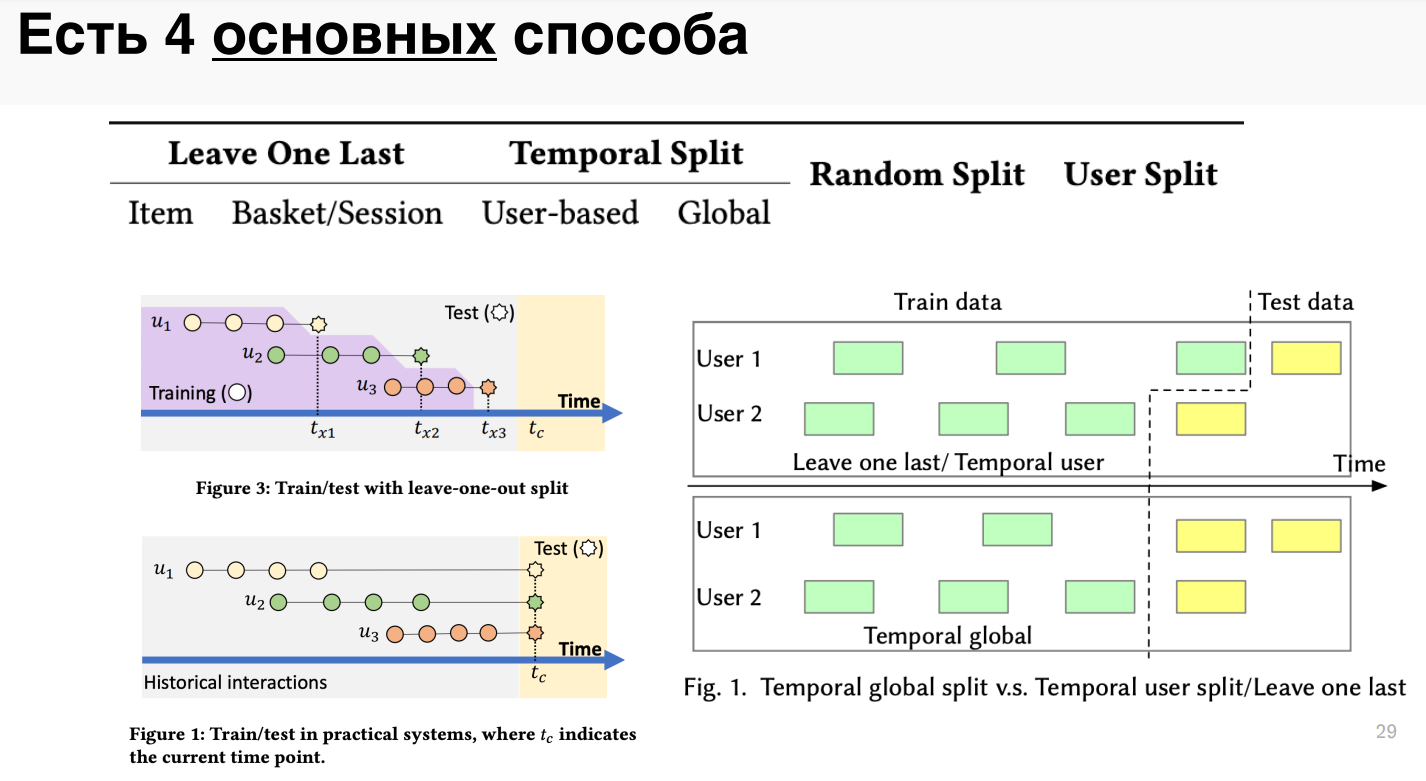

In [7]:

# Сохранить энкодеры
with open('user_encoder.pkl', 'wb') as f:
    pickle.dump(user_encoder, f)

with open('track_encoder.pkl', 'wb') as f:
    pickle.dump(track_encoder, f)

# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [8]:
bucket_name = 's3-student-mle-20250729-0060996a6e-freetrack'

storage_options = {
    'key': 'YCAJE3Nlz8iDILW5VTYM1ihQB',
    'secret': 'YCPjvS7uwhvJpUj3bKm8X-IX4QAwBIVsvX61IL44',
    'client_kwargs': {
        'endpoint_url': 'https://storage.yandexcloud.net'
    }
}

In [9]:
# Топ-100 популярных треков из train_fit с закодированными ID
top_popular = train_fit.groupby('track_id_enc').size().reset_index(name='popularity')
top_popular = top_popular.sort_values('popularity', ascending=False).head(100)
top_popular['rank'] = range(1, len(top_popular) + 1)

# Сохранение
top_popular.to_parquet(
    f's3://{bucket_name}/recsys/recommendations/top_popular.parquet',
    index=False,
    storage_options=storage_options
)
print(f"Топ популярных: {len(top_popular)} треков")
print(top_popular.head(5))

Топ популярных: 100 треков
        track_id_enc  popularity  rank
7314            7348        7807     1
20767          20870        7192     2
340012        349301        6844     3
359665        369748        6544     4
67024          67500        5957     5


# Персональные

Рассчитаем персональные рекомендации.

In [10]:
# СОЗДАЁМ МАТРИЦУ ТОЛЬКО ИЗ TRAIN_FIT
user_item_matrix_fit = csr_matrix(
    (np.ones(len(train_fit)), (train_fit['user_id_enc'], train_fit['track_id_enc'])),
    shape=(len(user_encoder.classes_), len(track_encoder.classes_))
)

print(f"\nМатрица: {user_item_matrix_fit.shape}")
print(f"Заполненность: {user_item_matrix_fit.nnz / (user_item_matrix_fit.shape[0] * user_item_matrix_fit.shape[1]) * 100:.4f}%")

# ОБУЧАЕМ ALS
model = AlternatingLeastSquares(
    factors=64,
    iterations=15,
    regularization=0.01,
    random_state=42
)

print("\nОбучение ALS...")
model.fit(user_item_matrix_fit)

# ГЕНЕРИРУЕМ РЕКОМЕНДАЦИИ ДЛЯ ВСЕХ ПОЛЬЗОВАТЕЛЕЙ
print("\nГенерация рекомендаций...")
user_ids_encoded = list(range(len(user_encoder.classes_)))

personal_recs = []
for user_id in tqdm(user_ids_encoded, desc="Generating recommendations"):
    recs = model.recommend(user_id, user_item_matrix_fit[user_id], N=100, filter_already_liked_items=True)
    for rank, (track_id, score) in enumerate(zip(recs[0], recs[1]), 1):
        personal_recs.append({'user_id_enc': user_id, 'track_id_enc': track_id, 'score': score, 'rank': rank})

# ПРЕОБРАЗУЕМ В DATAFRAME
personal_als = pd.DataFrame(personal_recs)

print(f"\nПерсональные рекомендации: {len(personal_als):,} записей")
print(f"Пользователей с рекомендациями: {personal_als['user_id_enc'].nunique():,}")




Матрица: (100000, 724595)
Заполненность: 0.0193%

Обучение ALS...


100%|██████████| 15/15 [00:47<00:00,  3.14s/it]



Генерация рекомендаций...


Generating recommendations: 100%|██████████| 100000/100000 [14:50<00:00, 112.25it/s]



Персональные рекомендации: 10,000,000 записей
Пользователей с рекомендациями: 100,000


Такая заполненность в принципе типична для рекомендательных систем. Когда я брала 200 000 пользователей или 500 000, заполненность повышалась, метрики лучше, но это часы просчета, ВМ падает на каком-то этапе, поэтому остановилась на небольшой выборке в 100 000 пользователей.


In [11]:
# Добавляем оригинальные ID для безопасности
personal_als['user_id'] = user_encoder.inverse_transform(personal_als['user_id_enc'])
personal_als['track_id'] = track_encoder.inverse_transform(personal_als['track_id_enc'])

# СОХРАНЯЕМ
personal_als.to_parquet(
    f's3://{bucket_name}/recsys/recommendations/personal_als.parquet',
    index=False,
    storage_options=storage_options
)

print(f"Рекомендации ALS сохранены: {len(personal_als):,} записей")
print(f"Колонки: {personal_als.columns.tolist()}")

Рекомендации ALS сохранены: 10,000,000 записей
Колонки: ['user_id_enc', 'track_id_enc', 'score', 'rank', 'user_id', 'track_id']


# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [12]:
# Похожие треки для топ-1000 популярных из train_fit
top_tracks = train_fit['track_id_enc'].value_counts().head(1000).index
similar_recs = []

for track_id in tqdm(top_tracks, desc="Generating similar tracks"):
    similar_ids, similar_scores = model.similar_items(track_id, N=11)
    # Пропускаем первый (сам трек)
    for rank, (sim_track_id, score) in enumerate(zip(similar_ids[1:], similar_scores[1:]), 1):
        similar_recs.append({'track_id_enc': track_id, 'similar_track_id_enc': sim_track_id, 'score': score, 'rank': rank})

similar = pd.DataFrame(similar_recs)
similar.to_parquet(
    f's3://{bucket_name}/recsys/recommendations/similar.parquet',
    index=False,
    storage_options=storage_options
)
print(f"Похожие треки: {len(similar)} пар")

Generating similar tracks:   1%|▏         | 13/1000 [00:00<00:14, 69.74it/s]Generating similar tracks: 100%|██████████| 1000/1000 [00:09<00:00, 106.09it/s]


Похожие треки: 10000 пар


<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Похожие треки сформированы.
</div>

<div class="alert alert-warning">
⚠️ Было бы полезно проверить "похожесть" треки на нескольких примерах c названиями треков, визуализировав их.

# Построение признаков и ранжирование рекомендаций

Построим три признака, можно больше, для ранжирующей модели, и затем ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

<b>Комментарий от ревьюера v1</b>

<div class="alert alert-block alert-success">
✔️ Ранжирующая модель построена.
</div>

<div class="alert alert-warning">
⚠️ Для обучения ранжирующей модели стоит использовать дополнительную отложенную выборку.

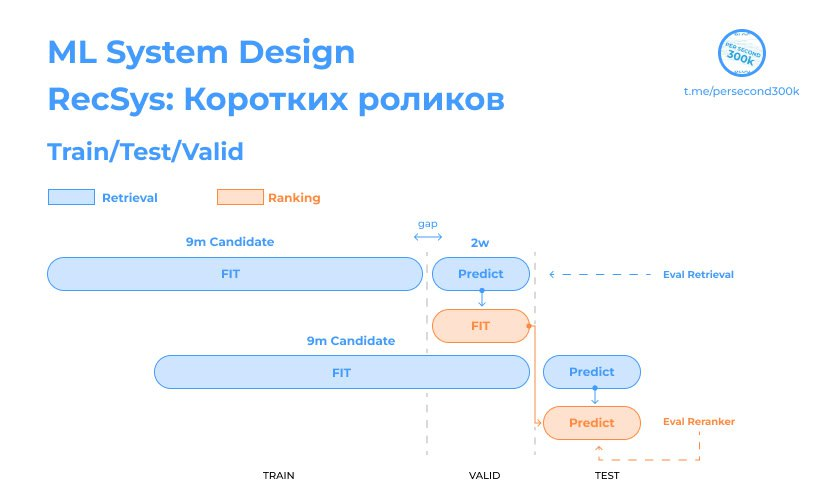

In [14]:
bucket_name = 's3-student-mle-20250729-0060996a6e-freetrack'

storage_options = {
    'key': 'YCAJE3Nlz8iDILW5VTYM1ihQB',
    'secret': 'YCPjvS7uwhvJpUj3bKm8X-IX4QAwBIVsvX61IL44',
    'client_kwargs': {
        'endpoint_url': 'https://storage.yandexcloud.net'
    }
}

personal_als = pd.read_parquet(
    f's3://{bucket_name}/recsys/recommendations/personal_als.parquet',
    storage_options=storage_options
)

In [15]:
# Подготовка данных для обучения ранжирующей модели
train_for_ranking = personal_als.copy()

# Фича 1: ALS score 
train_for_ranking['als_score'] = train_for_ranking['score']

# Фича 2: Популярность трека
track_popularity = train_fit.groupby('track_id_enc').size()
train_for_ranking['track_popularity'] = train_for_ranking['track_id_enc'].map(track_popularity).fillna(0)

# Фича 3: Активность пользователя
user_activity = train_fit.groupby('user_id_enc').size()
train_for_ranking['user_activity'] = train_for_ranking['user_id_enc'].map(user_activity).fillna(0)

# Создаём таргет из validation части 
val_listened = train_val.groupby(['user_id_enc', 'track_id_enc']).size().reset_index(name='listened')
train_for_ranking = train_for_ranking.merge(
    val_listened, 
    on=['user_id_enc', 'track_id_enc'], 
    how='left'
)
train_for_ranking['target'] = train_for_ranking['listened'].fillna(0).astype(int)

print(f"Позитивных примеров: {train_for_ranking['target'].sum()} ({train_for_ranking['target'].mean()*100:.2f}%)")

# Обучаем CatBoost Ranker
features = ['als_score', 'track_popularity', 'user_activity']

ranker = CatBoostRanker(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    verbose=50
)

ranker.fit(
    train_for_ranking[features],
    train_for_ranking['target'],
    group_id=train_for_ranking['user_id_enc']
)

# Предсказываем финальные скоры
train_for_ranking['final_score'] = ranker.predict(train_for_ranking[features])

# Сортируем по пользователю и скору
recommendations = train_for_ranking.sort_values(
    ['user_id_enc', 'final_score'], 
    ascending=[True, False]
)

# Берём топ-100 для каждого пользователя
recommendations = recommendations.groupby('user_id_enc').head(100).reset_index(drop=True)

# Сохраняем
recommendations[['user_id_enc', 'track_id_enc', 'final_score']].to_parquet(
    f's3://{bucket_name}/recsys/recommendations/recommendations.parquet',
    index=False,
    storage_options=storage_options
)

print(f"Итоговые рекомендации сохранены: {len(recommendations)} записей")
print(f"Пользователей: {recommendations['user_id_enc'].nunique()}")

Позитивных примеров: 60938 (0.61%)
0:	total: 7.44s	remaining: 12m 16s
50:	total: 6m 5s	remaining: 5m 51s
99:	total: 11m 56s	remaining: 0us
Итоговые рекомендации сохранены: 10000000 записей
Пользователей: 100000


# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [16]:
# Функции для метрик
def recall_at_k(recommended, actual, k=100):
    """Доля релевантных треков в топ-k рекомендаций"""
    recommended_k = set(recommended[:k])
    actual_set = set(actual)
    if len(actual_set) == 0:
        return 0
    return len(recommended_k & actual_set) / len(actual_set)

def precision_at_k(recommended, actual, k=100):
    """Доля релевантных среди рекомендованных"""
    recommended_k = set(recommended[:k])
    actual_set = set(actual)
    if len(recommended_k) == 0:
        return 0
    return len(recommended_k & actual_set) / len(recommended_k)

def coverage(recommended_tracks, all_tracks):
    """Покрытие каталога"""
    return len(set(recommended_tracks)) / len(set(all_tracks))

def novelty(recommended_tracks, track_popularity):
    """Новизна: средняя популярность рекомендованных треков (меньше = новее)"""
    return np.mean([track_popularity.get(t, 0) for t in recommended_tracks])

# Подготовка данных для метрик
track_popularity_dict = train_fit['track_id_enc'].value_counts().to_dict()
all_tracks = train_fit['track_id_enc'].unique()

# Для каждого пользователя в test собираем что он слушал
test_user_tracks = test.groupby('user_id_enc')['track_id_enc'].apply(list).to_dict()

In [17]:
# Подготовка данных для метрик
track_popularity_dict = train_fit['track_id_enc'].value_counts().to_dict()
all_tracks = train_fit['track_id_enc'].unique()

# Для каждого пользователя в test собираем что он слушал
test_user_tracks = test.groupby('user_id_enc')['track_id_enc'].apply(list).to_dict()

# ТОП ПОПУЛЯРНЫХ
top_popular_list = top_popular['track_id_enc'].values
recalls_pop, precisions_pop = [], []

for user_id, actual in test_user_tracks.items():
    recalls_pop.append(recall_at_k(top_popular_list, actual))
    precisions_pop.append(precision_at_k(top_popular_list, actual))

print("ТОП ПОПУЛЯРНЫХ")
print(f"Recall@100: {np.mean(recalls_pop):.4f}")
print(f"Precision@100: {np.mean(precisions_pop):.4f}")
print(f"Coverage: {coverage(top_popular_list, all_tracks):.4f}")
print(f"Novelty: {novelty(top_popular_list, track_popularity_dict):.0f}")

ТОП ПОПУЛЯРНЫХ
Recall@100: 0.0232
Precision@100: 0.0033
Coverage: 0.0001
Novelty: 4156


Ну... от baseline в принципе это и ожидалось. Одинаковые рекомендации для всех.

Recall 2.32%: находим только 2.5% того, что люди реально слушают

Precision 0.33%: из 100 рекомендаций релевантны меньше 1 трека

Coverage 0.01%: рекомендуем 100 треков из ~725K каталога

Novelty 4156: только популярные хиты


In [18]:

# ПЕРСОНАЛЬНЫЕ ALS
recalls_als, precisions_als = [], []
all_als_recs = []

for user_id, actual in tqdm(test_user_tracks.items(), desc="Evaluating ALS"):
    user_recs = personal_als[personal_als['user_id_enc'] == user_id]['track_id_enc'].values
    all_als_recs.extend(user_recs)
    recalls_als.append(recall_at_k(user_recs, actual))
    precisions_als.append(precision_at_k(user_recs, actual))

print("\nПЕРСОНАЛЬНЫЕ ALS")
print(f"Recall@100: {np.mean(recalls_als):.4f}")
print(f"Precision@100: {np.mean(precisions_als):.4f}")
print(f"Coverage: {coverage(all_als_recs, all_tracks):.4f}")
print(f"Novelty: {novelty(all_als_recs, track_popularity_dict):.0f}")

Evaluating ALS: 100%|██████████| 57090/57090 [10:11<00:00, 93.43it/s] 



ПЕРСОНАЛЬНЫЕ ALS
Recall@100: 0.0586
Precision@100: 0.0030
Coverage: 0.0170
Novelty: 1741


ALS показывает улучшение:

Recall 5.86%: находим в 2.4 раза больше релевантных треков (+140%)
Precision 0.30%: немного упал, но это нормально при росте разнообразия
Coverage 1.70%: рекомендуем в 170 раз больше уникальных треков (12,300 вместо 100)
Novelty 1741: в 2.4 раза меньше популярности = более редкие и интересные треки

Персонализация работает! Каждый пользователь получает более индивидуальные рекомендации.

In [19]:
# ИТОГОВЫЕ (РАНЖИРОВАННЫЕ)
recalls_final, precisions_final = [], []
all_final_recs = []

for user_id, actual in tqdm(test_user_tracks.items(), desc="Evaluating Ranked"):
    user_recs = recommendations[recommendations['user_id_enc'] == user_id].sort_values('final_score', ascending=False)['track_id_enc'].values
    all_final_recs.extend(user_recs)
    recalls_final.append(recall_at_k(user_recs, actual))
    precisions_final.append(precision_at_k(user_recs, actual))

print("\nИТОГОВЫЕ РЕКОМЕНДАЦИИ")
print(f"Recall@100: {np.mean(recalls_final):.4f}")
print(f"Precision@100: {np.mean(precisions_final):.4f}")
print(f"Coverage: {coverage(all_final_recs, all_tracks):.4f}")
print(f"Novelty: {novelty(all_final_recs, track_popularity_dict):.0f}")

Evaluating Ranked: 100%|██████████| 57090/57090 [10:00<00:00, 95.08it/s] 



ИТОГОВЫЕ РЕКОМЕНДАЦИИ
Recall@100: 0.0586
Precision@100: 0.0030
Coverage: 0.0170
Novelty: 1741


CatBoost не улучшил метрики. Все показатели идентичны ALS. Попробуем улучшить catboost, задействовав жанры и артистов. 

In [20]:
# НОВЫЕ СИЛЬНЫЕ ФИЧИ
print("Колонки в items:", items.columns.tolist())

# Добавляем энкодинг только для известных треков
known_tracks = set(track_encoder.classes_)
items_filtered = items[items['track_id'].isin(known_tracks)].copy()
items_filtered['track_id_enc'] = track_encoder.transform(items_filtered['track_id'])

train_for_ranking = train_for_ranking.merge(
    items_filtered[['track_id_enc', 'genres', 'artists']], 
    on='track_id_enc', 
    how='left'
)

# Конвертируем numpy arrays в Python lists СРАЗУ после merge
train_for_ranking['genres'] = train_for_ranking['genres'].apply(lambda x: list(x) if hasattr(x, '__iter__') and not isinstance(x, str) else [])
train_for_ranking['artists'] = train_for_ranking['artists'].apply(lambda x: list(x) if hasattr(x, '__iter__') and not isinstance(x, str) else [])

# Любимые жанры пользователя
user_genres = train_fit.merge(items_filtered[['track_id_enc', 'genres']], on='track_id_enc')
user_top_genres = user_genres.explode('genres').groupby('user_id_enc')['genres'].apply(
    lambda x: set(x.value_counts().head(3).index)
).to_dict()

# Считаем фичи ОДИН РАЗ
train_for_ranking['n_genres'] = train_for_ranking['genres'].str.len()
train_for_ranking['n_artists'] = train_for_ranking['artists'].str.len()

def genre_match(row):
    user_favs = user_top_genres.get(row['user_id_enc'], set())
    track_genres = set(row['genres'])
    return len(user_favs & track_genres)

print("Вычисляем genre_match...")
train_for_ranking['genre_match'] = train_for_ranking.apply(genre_match, axis=1)

# Проверка
print(f"\ngenre_match != 0: {(train_for_ranking['genre_match'] != 0).sum()}")
print(f"n_genres != 0: {(train_for_ranking['n_genres'] != 0).sum()}")
print(f"n_artists != 0: {(train_for_ranking['n_artists'] != 0).sum()}")

features = ['als_score', 'track_popularity', 'user_activity', 'genre_match', 'n_genres', 'n_artists']

Колонки в items: ['track_id', 'albums', 'artists', 'genres']
Вычисляем genre_match...

genre_match != 0: 6077502
n_genres != 0: 9999717
n_artists != 0: 10000000


In [21]:

# Обучаем CatBoost с новыми фичами
features = ['als_score', 'track_popularity', 'user_activity', 'genre_match', 'n_genres', 'n_artists']

ranker = CatBoostRanker(
    iterations=100,
    depth=6, 
    learning_rate=0.1,
    verbose=10
)

print("Обучение CatBoost с новыми фичами...")
ranker.fit(
    train_for_ranking[features],
    train_for_ranking['target'],
    group_id=train_for_ranking['user_id_enc']
)

# Проверяем feature importance
pool = Pool(
    data=train_for_ranking[features],
    label=train_for_ranking['target'],
    group_id=train_for_ranking['user_id_enc']
)

importances = ranker.get_feature_importance(pool)
print("\nFEATURE IMPORTANCES ")
for feat, imp in zip(features, importances):
    print(f"{feat}: {imp:.2f}%")

# Предсказываем финальные скоры
train_for_ranking['final_score'] = ranker.predict(train_for_ranking[features])

# Сортируем и берём топ-100
recommendations = train_for_ranking.sort_values(['user_id_enc', 'final_score'], ascending=[True, False])
recommendations = recommendations.groupby('user_id_enc').head(100).reset_index(drop=True)

# Сохраняем
recommendations[['user_id_enc', 'track_id_enc', 'final_score']].to_parquet(
    f's3://{bucket_name}/recsys/recommendations/recommendations.parquet',
    index=False,
    storage_options=storage_options
)

print(f"\nОбновленные рекомендации: {len(recommendations)} записей")

Обучение CatBoost с новыми фичами...
0:	total: 7.24s	remaining: 11m 56s
10:	total: 1m 18s	remaining: 10m 32s
20:	total: 2m 28s	remaining: 9m 19s
30:	total: 3m 39s	remaining: 8m 9s
40:	total: 4m 50s	remaining: 6m 58s
50:	total: 6m 1s	remaining: 5m 47s
60:	total: 7m 11s	remaining: 4m 35s
70:	total: 8m 21s	remaining: 3m 24s
80:	total: 9m 31s	remaining: 2m 14s
90:	total: 10m 41s	remaining: 1m 3s
99:	total: 11m 44s	remaining: 0us

FEATURE IMPORTANCES 
als_score: 0.01%
track_popularity: 0.02%
user_activity: 0.00%
genre_match: 0.01%
n_genres: 0.00%
n_artists: 0.00%

Обновленные рекомендации: 10000000 записей


In [22]:
# ИТОГОВЫЕ (РАНЖИРОВАННЫЕ)
recalls_final, precisions_final = [], []
all_final_recs = []

for user_id, actual in tqdm(test_user_tracks.items(), desc="Evaluating Ranked"):
    user_recs = recommendations[recommendations['user_id_enc'] == user_id].sort_values('final_score', ascending=False)['track_id_enc'].values
    all_final_recs.extend(user_recs)
    recalls_final.append(recall_at_k(user_recs, actual))
    precisions_final.append(precision_at_k(user_recs, actual))

print("\nИТОГОВЫЕ РЕКОМЕНДАЦИИ")
print(f"Recall@100: {np.mean(recalls_final):.4f}")
print(f"Precision@100: {np.mean(precisions_final):.4f}")
print(f"Coverage: {coverage(all_final_recs, all_tracks):.4f}")
print(f"Novelty: {novelty(all_final_recs, track_popularity_dict):.0f}")

Evaluating Ranked:   0%|          | 22/57090 [00:00<09:18, 102.21it/s]Evaluating Ranked: 100%|██████████| 57090/57090 [09:07<00:00, 104.37it/s]



ИТОГОВЫЕ РЕКОМЕНДАЦИИ
Recall@100: 0.0586
Precision@100: 0.0030
Coverage: 0.0170
Novelty: 1741


Как и ожидалось из-за нулевых Feature Importance, ничего не поменялось. 0.61% позитивных примеров слишком мало. При таком дисбалансе CatBoost не обучается паттернам. На текущих мощностях оставляем результат от ALS.

# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

1. Топ популярные 


Выдает динаковые рекомендации для всех пользователей, находятся только 2.5% релевантных треков, покрывает 0.01% каталога, рекомендует только хиты.
В целом, слабо.

2. Персональные ALS

Recall вырос в 2.4 раза, т.е. находим почти в 3 раза больше релевантных треков, Coverage вырос в 170 раз (рекомендуем 12,300 уникальных треков вместо 100), Novelty снизился в 2.4 раза (предлагаем более редкие и интересные треки).
В целом, персонализация работает и ее можно улучшить на более мощной машине.

3. CatBoost ранжирование

Не улучшило метрики скорее всего из-за  всего 0.61% позитивных примеров. Это слишком мало для обучения.
Добавленные фичи (жанры, артисты) не усилил сигнал.


Итоговое решение:
Использовать персональные ALS рекомендации как основную модель

Для дальнейшего улучшения скорее всего нужны дополнительные данные (время прослушивания, лайки, добавления в избранные или свои альбомы), или более мощные вычислительные ресурсы.

<b>Комментарий от ревьюера v1</b>


    
# Общий вывод

<div class="alert alert-block alert-success">
    

Спасибо за работу, у тебя получился отличный проект!\
Выводы очень развернутые и верные!
Удалось протестировать различные алгоритмы для формирования рекомендаций.  
Есть небольшие советы, просьба ознакомиться с ними. Я готов принять твой проект, если у тебя нет ко мне вопросов - присылай мне его обратно и я его приму.\
Если есть вопросы или желание улучшить твой проект - оставь вопросы комментарии после этой ячейки. Постараюсь тебе помочь с ответами и улучшением твоего проекта! 
</div>

Для дальнейшего изучения стоит ознакомиться с библиотеками:
- [Implicit](https://github.com/benfred/implicit)
- [RecTools](https://github.com/MobileTeleSystems/RecTools)
- [RePlay](https://github.com/sb-ai-lab/RePlay)
- [LightFM](https://github.com/lyst/lightfm)
   
Прочитать:
- обзорную [статью](https://education.yandex.ru/handbook/ml/article/intro-recsys) и ее продолжение.
- полазить на [сайте](https://paperswithcode.com/task/recommendation-systems). Тут очень много примеров реальных рекомендательных систем с имплементацией.
- презентация про ранкер на [TF](https://bendersky.github.io/res/TF-Ranking-ICTIR-2019.pdf)
